In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn import over_sampling, under_sampling, combine

In [2]:
df = pd.read_csv('data/hacide_train.csv', index_col=0)
df

,cls,x1,x2
1,0,0.200798,0.678038
2,0,0.016620,1.576558
3,0,0.228725,-0.559534
4,0,0.126379,-0.093814
5,0,0.600821,-0.298395
...,...,...,...
996,1,-2.296385,-0.505279
997,1,1.022486,-1.802279
998,1,-1.549866,-2.899393
999,1,1.961917,-1.920985


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cls     1000 non-null   int64  
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 31.2 KB


In [4]:
df['cls'].value_counts()

0    980
1     20
Name: cls, dtype: int64

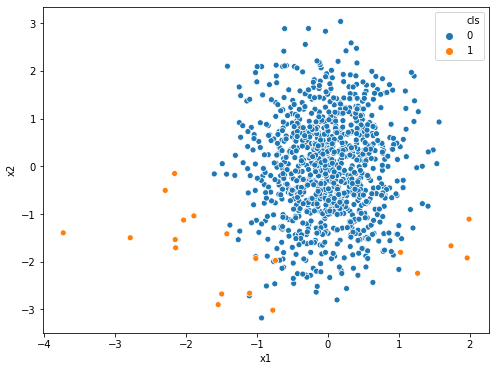

In [5]:
plt.figure(figsize=(8,6))
sb.scatterplot(data=df, x='x1', y='x2', hue='cls');

In [20]:
X = df[['x1', 'x2']]
y = df['cls']
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
print('Percent cls = 1\t: {}'.format(df_train['cls'].sum()/df_train.shape[0]))
print('Percent cls = 1\t: {}'.format(df_test['cls'].sum()/df_test.shape[0]))

Percent cls = 1	: 0.02
Percent cls = 1	: 0.02


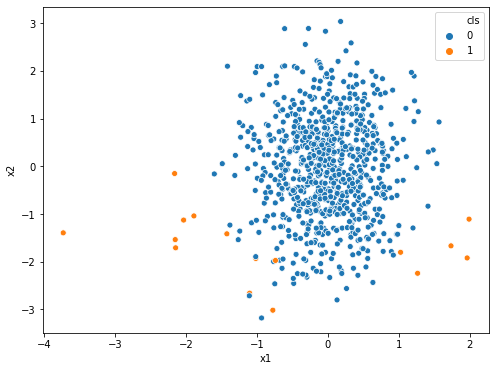

In [22]:
plt.figure(figsize=(8,6))
sb.scatterplot(data=df_train, x='x1', y='x2', hue='cls');

In [23]:
df_train_0 = df_train[df_train['cls']==0]
df_train_1 = df_train[df_train['cls']==1]
# Need to over-sampling df_train_1, or under_sampling df_train_0

In [28]:
df_train_0_under_sampling = resample(df_train_0, replace=False, n_samples = df_train_1.shape[0], random_state=1)
df_train_under = pd.concat([df_train_0_under_sampling, df_train_1], axis=0)
df_train_under.shape

(32, 3)

In [29]:
df_train_1_over_sampling = resample(df_train_1, replace=True, n_samples = df_train_0.shape[0], random_state=1)
df_train_over = pd.concat([df_train_1_over_sampling, df_train_0], axis=0)
df_train_over.shape

(1568, 3)

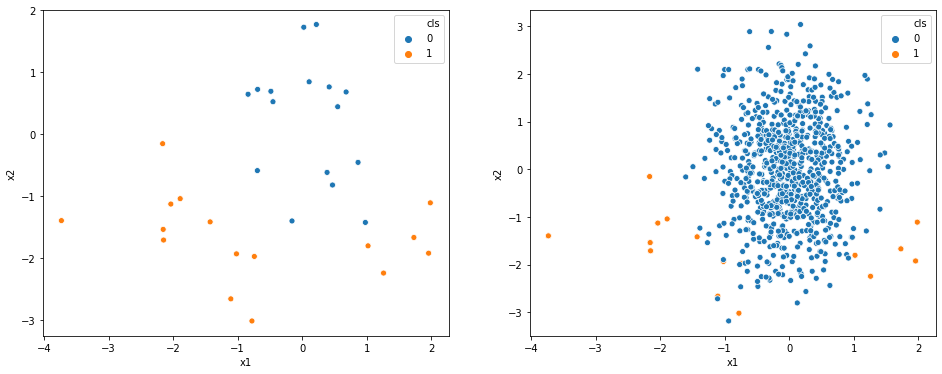

In [35]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sb.scatterplot(data=df_train_under, x='x1', y='x2', hue='cls')

plt.subplot(1,2,2)
sb.scatterplot(data=df_train_over, x='x1', y='x2', hue='cls')

plt.show()

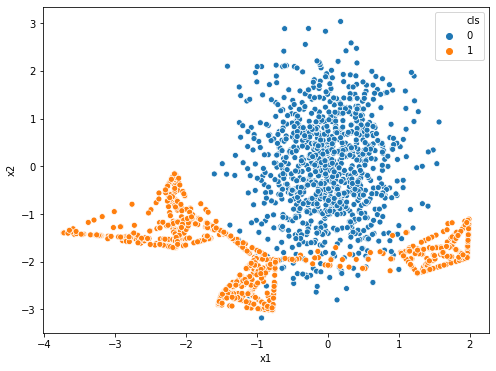

In [40]:
# Over with SMOTE
smote = over_sampling.SMOTE('minority')
X_train = df[['x1', 'x2']]
y_train = df['cls']
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

plt.figure(figsize=(8,6))
sb.scatterplot(data=X_train_smote, x='x1', y='x2', hue=y_train_smote);

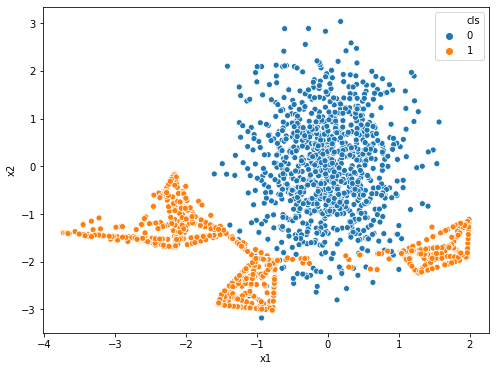

In [44]:
# Over with Combine
smotetomek = combine.SMOTETomek('auto')
X_train = df[['x1', 'x2']]
y_train = df['cls']
X_train_smote, y_train_smote = smotetomek.fit_sample(X_train, y_train)

plt.figure(figsize=(8,6))
sb.scatterplot(data=X_train_smote, x='x1', y='x2', hue=y_train_smote);